In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import time
from tqdm import tqdm
import os

In [2]:
ofname = 'eigenvals_Nlambda2_.txt'
Ns = np.arange(1,15)
Lambdas = np.linspace(0, 3, 20)
k = 21

In [13]:
times = np.empty((len(Ns), len(Lambdas)))
for i, N in enumerate(tqdm(Ns[:-1], 'Ns')):
    for j, Lambda in enumerate(tqdm(Lambdas, 'lambdas')):
        start = time.time()
        os.system('./exercise07 ' + f'-N {N} -l {Lambda} -k {k} -o {ofname} -dl 1')
        times[i, j] = time.time() - start

for j, Lambda in enumerate(tqdm(Lambdas[::2])):
        start = time.time()
        os.system('./exercise07 ' + f'-N {Ns[-1]} -l {Lambda} -k {k} -o {ofname} -dl 1')
        times[-1, j] = time.time() - start


#np.save('times.npy', times)

Ns:  69%|██████▉   | 9/13 [00:06<00:06,  1.58s/it]

In [3]:
data = pd.read_csv(ofname, names=['N', 'lambda']+[f'eigenvalue{i}' for i in range(k)], delim_whitespace=True)
data

,N,lambda,eigenvalue0,eigenvalue1,eigenvalue2,eigenvalue3,eigenvalue4,eigenvalue5,eigenvalue6,eigenvalue7,...,eigenvalue11,eigenvalue12,eigenvalue13,eigenvalue14,eigenvalue15,eigenvalue16,eigenvalue17,eigenvalue18,eigenvalue19,eigenvalue20
0,1,0.000000,0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.157895,-0.157895,0.157895,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.315789,-0.315789,0.315789,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.473684,-0.473684,0.473684,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.631579,-0.631579,0.631579,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,14,1.578947,-24.211348,-22.959994,-22.707657,-22.354823,-21.952549,-21.534275,-21.456304,-21.120853,...,-20.701196,-20.448858,-20.359617,-20.282922,-20.096024,-20.030585,-20.029052,-19.869500,-19.740211,-19.677750
266,14,1.894737,-28.268436,-26.400042,-26.179795,-25.856814,-25.472229,-25.059086,-24.641305,-24.311401,...,-23.768173,-23.603835,-23.509907,-23.383588,-23.206112,-23.190693,-23.060607,-22.970446,-22.950126,-22.772911
267,14,2.210526,-32.434229,-29.942264,-29.741089,-29.438424,-29.068395,-28.661876,-28.243588,-27.832488,...,-26.946459,-26.771668,-26.745284,-26.576430,-26.505355,-26.375255,-26.292941,-26.169910,-26.138433,-26.072590
268,14,2.526316,-36.665898,-33.547407,-33.358783,-33.070540,-32.712001,-32.311804,-31.894557,-31.480194,...,-30.240293,-30.122329,-29.952050,-29.902913,-29.763426,-29.743036,-29.645863,-29.593510,-29.404886,-29.193313


/tmp/ipykernel_2581/401260270.py:4: FutureWarning: The behavior of indexing on a MultiIndex with a nested sequence of labels is deprecated and will change in a future version. `series.loc[label, sequence]` will raise if any members of 'sequence' or not present in the index's second level. To retain the old behavior, use `series.index.isin(sequence, level=1)`
  ax = sns.lineplot(data_long.loc[(Ns, Lambdas, [0]),:], hue='N', x='lambda', y='eigenvalue')


Text(0.5, 1.0, 'Energy level 0 in function of $\\lambda$')

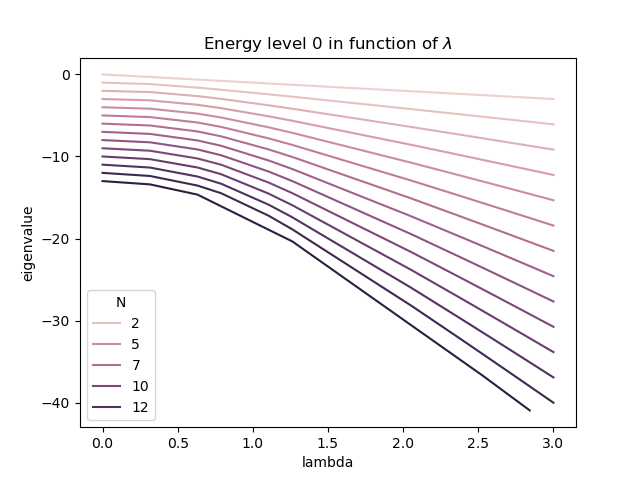

In [4]:
data_long = pd.wide_to_long(data, 'eigenvalue', ["N", "lambda"], 'eigenlevel')

%matplotlib ipympl
ax = sns.lineplot(data_long.loc[(Ns, Lambdas, [0]),:], hue='N', x='lambda', y='eigenvalue')
ax.set_title(r'Energy level 0 in function of $\lambda$')


Text(0, 0.5, '')

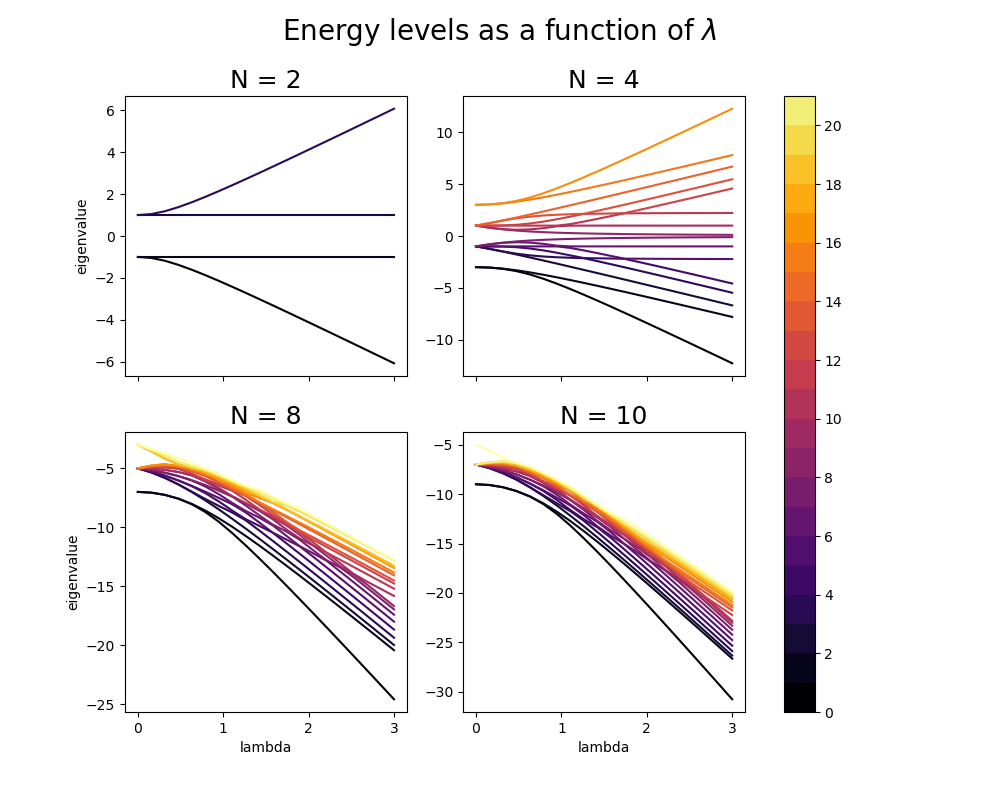

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
fig.suptitle(r'Energy levels as a function of $\lambda$', fontsize=20)

for i, N in enumerate([2, 4, 8, 10]):
    sns.lineplot(data_long.loc[(N, slice(3)), :], hue='eigenlevel', x='lambda', y='eigenvalue', palette='inferno', ax=axes[i//2,i%2], legend=False)
    axes[i//2,i%2].set_title(f'\nN = {N}', fontsize=18)

cmap = mpl.cm.get_cmap('inferno', k+1)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(0,k,k+1), k), cmap=cmap), ax=axes, ticks=np.linspace(0, k-1, 11, dtype=np.int32))
axes[1,1].set_ylabel('')
axes[0,1].set_ylabel('')
#fig.savefig('E_lambda.svg')

In [5]:
def bound(l):
    if(l >= -2 or l <= 2):
        return (-1 -l/4)
    else:
        return (-abs(l))

def bound2(l):
    x = np.linspace(0, 2*np.pi, 1000)
    return (np.min(np.cos(x)**2 + l*np.sin(x)))


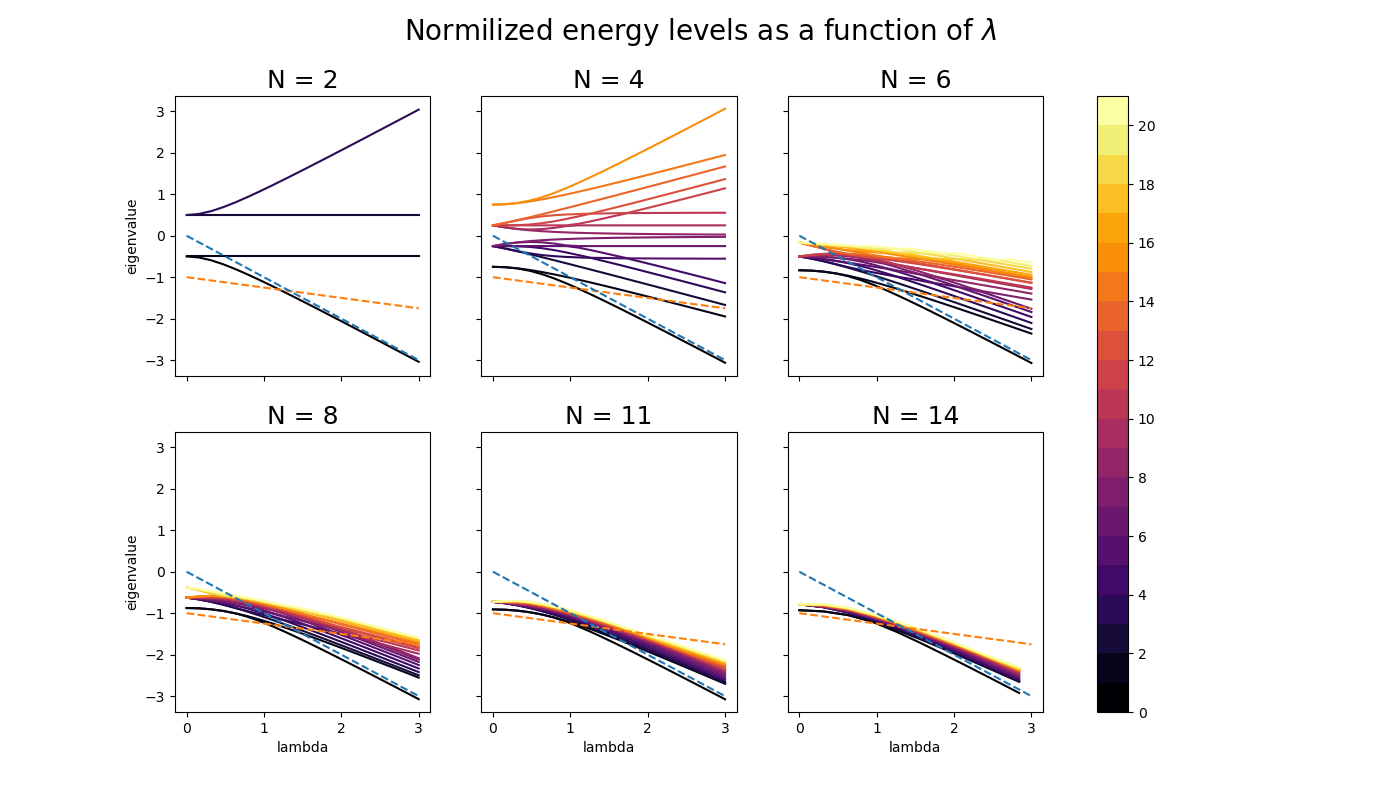

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=True, sharey=True)
fig.suptitle(r'Normilized energy levels as a function of $\lambda$', fontsize=20)

bound_y = [bound(l) for l in Lambdas]
bound2_y = [bound2(l) for l in Lambdas]

for i, N in enumerate([2, 4, 6, 8, 11, 14]):
    sns.lineplot(data_long.loc[(N, slice(3)), :]/N, hue='eigenlevel', x='lambda', y='eigenvalue', palette='inferno', ax=axes[i//3,i%3], legend=False)
    axes[i//3,i%3].set_title(f'\nN = {N}', fontsize=18)
    axes[i//3,i%3].plot(Lambdas, bound_y, '--', color='tab:orange')
    axes[i//3,i%3].plot(Lambdas, bound2_y, '--', color='tab:blue')

cmap = mpl.cm.get_cmap('inferno', k)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.BoundaryNorm(np.linspace(0,k,k+1), k), cmap=cmap), ax=axes, ticks=np.linspace(0, k-1, 11, dtype=np.int32))
fig.savefig('eN_lambda.svg')

# Performances

Text(0.5, 0, 'N')

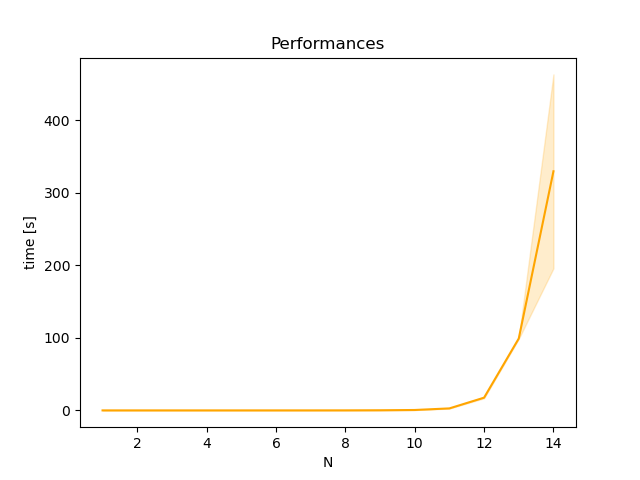

In [58]:
times = np.load('times_.npy', allow_pickle=True)
%matplotlib ipympl
ax = sns.lineplot(times_melt, x='N', y='value', c='orange')
ax.set_title('Performances')
ax.set_ylabel('time [s]')
ax.set_xlabel('N')

In [56]:
times_df = pd.DataFrame(times)
times_df['N'] = times_df.index +1
times_melt = pd.melt(times_df, ['N'])

In [57]:
times_melt

,N,variable,value
0,1,0,6.456614e-03
1,2,0,6.335258e-03
2,3,0,6.324530e-03
3,4,0,6.731749e-03
4,5,0,6.714582e-03
...,...,...,...
275,10,19,5.891676e-01
276,11,19,3.922878e+00
277,12,19,1.575552e+01
278,13,19,9.921899e+01
